In [1]:
# Google ColabÏóêÏÑú ÎÖ∏Ìä∏Î∂Å Ïã§ÌñâÏóê ÎåÄÌïú ÌåÅÏùÄ ÏïÑÎûò ÎßÅÌÅ¨Î•º Ï∞∏Í≥†ÌïòÏÑ∏Ïöî.
# https://pytorch.org/tutorials/beginner/colab

%matplotlib inline

TorchVision Object Detection Finetuning Tutorial
================================================


Ïù¥ ÌäúÌÜ†Î¶¨ÏñºÏóêÏÑúÎäî ÏÇ¨Ï†Ñ ÌïôÏäµÎêú Mask R-CNN Î™®Îç∏ÏùÑ Penn-Fudan Î≥¥ÌñâÏûê ÌÉêÏßÄ Î∞è ÏÑ∏Î∂ÑÌôî Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§Ïóê ÎßûÏ∂∞ ÎØ∏ÏÑ∏ Ï°∞Ï†ï(finetuning)Ìï† Í≤ÉÏûÖÎãàÎã§. Ïù¥ Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ÏóêÎäî 170Ïû•Ïùò Ïù¥ÎØ∏ÏßÄÏôÄ 345Í∞úÏùò Î≥¥ÌñâÏûê Ïù∏Ïä§ÌÑ¥Ïä§Í∞Ä Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏúºÎ©∞, Ïù¥Î•º ÌôúÏö©ÌïòÏó¨ torchvisionÏùò ÏÉàÎ°úÏö¥ Í∏∞Îä•ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏÇ¨Ïö©Ïûê ÏßÄÏ†ï Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Í∞ùÏ≤¥ ÌÉêÏßÄ(object detection) Î∞è Ïù∏Ïä§ÌÑ¥Ïä§ ÏÑ∏Î∂ÑÌôî(instance segmentation) Î™®Îç∏ÏùÑ ÌïôÏäµÌïòÎäî Î∞©Î≤ïÏùÑ ÏÑ§Î™ÖÌï©ÎãàÎã§.

Defining the Dataset
====================

Í∞ùÏ≤¥ ÌÉêÏßÄ, Ïù∏Ïä§ÌÑ¥Ïä§ ÏÑ∏Î∂ÑÌôî, Í∑∏Î¶¨Í≥† ÏÇ¨ÎûåÏùò ÌÇ§Ìè¨Ïù∏Ìä∏ ÌÉêÏßÄÎ•º ÏúÑÌïú ÌïôÏäµÏö© Ï∞∏Í≥† Ïä§ÌÅ¨Î¶ΩÌä∏Îäî ÏÉàÎ°úÏö¥ ÏÇ¨Ïö©Ïûê ÏßÄÏ†ï Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏâΩÍ≤å Ï∂îÍ∞ÄÌï† Ïàò ÏûàÎèÑÎ°ù ÏßÄÏõêÌï©ÎãàÎã§.  

ÏÇ¨Ïö©Ïûê ÏßÄÏ†ï Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ `torch.utils.data.Dataset` ÌÅ¥ÎûòÏä§Î•º ÏÉÅÏÜçÌï¥Ïïº ÌïòÎ©∞, `__len__`(Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Ï¥ù ÏÉòÌîå Ïàò Î∞òÌôò)Í≥º `__getitem__`(Í∞úÎ≥Ñ ÏÉòÌîåÏùÑ Î°úÎìúÌïòÎäî Î©îÏÑúÎìú)ÏùÑ Î∞òÎìúÏãú Íµ¨ÌòÑÌï¥Ïïº Ìï©ÎãàÎã§.

Ïö∞Î¶¨Í∞Ä ÏöîÍµ¨ÌïòÎäî Ïú†ÏùºÌïú ÌäπÏàò ÏÇ¨Ìï≠ÏùÄ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò `__getitem__` Î©îÏÑúÎìúÍ∞Ä ÌäúÌîåÏùÑ Î∞òÌôòÌï¥Ïïº ÌïúÎã§Îäî Í≤ÉÏûÖÎãàÎã§.

- **image**: `torchvision.tv_tensors.Image` ÌòïÏãùÏùò `[3, H, W]` ÌÅ¨Í∏∞ ÌÖêÏÑú, ÏàúÏàò ÌÖêÏÑú ÎòêÎäî `(H, W)` ÌÅ¨Í∏∞Ïùò PIL Ïù¥ÎØ∏ÏßÄ  
- **target**: Îã§Ïùå ÌïÑÎìúÎ•º Ìè¨Ìï®ÌïòÎäî ÎîïÏÖîÎÑàÎ¶¨:
    - `boxes`: `torchvision.tv_tensors.BoundingBoxes` ÌòïÏãùÏùò `[N, 4]` ÌÅ¨Í∏∞ ÌÖêÏÑú, `N`Í∞úÏùò Î∞îÏö¥Îî© Î∞ïÏä§Ïùò Ï¢åÌëúÎ•º `[x0, y0, x1, y1]` ÌòïÏãùÏúºÎ°ú ÎÇòÌÉÄÎÉÖÎãàÎã§. `x0`, `y0`Îäî ÏôºÏ™Ω ÏÉÅÎã®, `x1`, `y1`ÏùÄ Ïò§Î•∏Ï™Ω ÌïòÎã® Ï¢åÌëúÎ°ú, `0`Î∂ÄÌÑ∞ `W`ÏôÄ `0`Î∂ÄÌÑ∞ `H` Î≤îÏúÑÏûÖÎãàÎã§.

    - `labels`: `torch.Tensor` ÌòïÏãùÏùò Ï†ïÏàò ÌÖêÏÑú `[N]`, Í∞Å Î∞îÏö¥Îî© Î∞ïÏä§Ïóê ÎåÄÌïú Î†àÏù¥Î∏îÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§. `0`ÏùÄ Ìï≠ÏÉÅ Î∞∞Í≤Ω ÌÅ¥ÎûòÏä§Î•º ÎÇòÌÉÄÎÉÖÎãàÎã§.

    - `image_id`: Ï†ïÏàòÎ°ú, Ïù¥ÎØ∏ÏßÄ ÏãùÎ≥ÑÏûêÏûÖÎãàÎã§. Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Î™®Îì† Ïù¥ÎØ∏ÏßÄÏóêÏÑú Í≥†Ïú†Ìï¥Ïïº ÌïòÎ©∞, ÌèâÍ∞Ä Ï§ëÏóê ÏÇ¨Ïö©Îê©ÎãàÎã§.

    - `area`: `torch.Tensor` ÌòïÏãùÏùò Ïã§Ïàò ÌÖêÏÑú `[N]`, Î∞îÏö¥Îî© Î∞ïÏä§Ïùò Î©¥Ï†ÅÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§. COCO Î©îÌä∏Î¶≠ ÌèâÍ∞ÄÏóêÏÑú ÏûëÏùÄ, Ï§ëÍ∞Ñ, ÌÅ∞ Î∞ïÏä§ Í∞ÑÏùò Î©îÌä∏Î¶≠ Ï†êÏàòÎ•º Íµ¨Î∂ÑÌïòÎäî Îç∞ ÏÇ¨Ïö©Îê©ÎãàÎã§.

    - `iscrowd`: `uint8` ÌòïÏãùÏùò `torch.Tensor` ÌÖêÏÑú `[N]`, `iscrowd=True`Î°ú ÏÑ§Ï†ïÎêú Ïù∏Ïä§ÌÑ¥Ïä§Îäî ÌèâÍ∞Ä Ï§ë Î¨¥ÏãúÎê©ÎãàÎã§.
    
    - (ÏÑ†ÌÉùÏ†ÅÏúºÎ°ú) `masks`: `torchvision.tv_tensors.Mask` ÌòïÏãùÏùò `[N, H, W]` ÌÅ¨Í∏∞ ÌÖêÏÑú, Í∞Å Í∞ùÏ≤¥Ïùò ÏÑ∏Í∑∏Î©òÌÖåÏù¥ÏÖò ÎßàÏä§ÌÅ¨


ÎßåÏïΩ Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ ÏúÑÏùò ÏöîÍµ¨ÏÇ¨Ìï≠ÏùÑ Ï§ÄÏàòÌïúÎã§Î©¥, Ï∞∏Ï°∞ Ïä§ÌÅ¨Î¶ΩÌä∏Ïùò ÌïôÏäµ Î∞è ÌèâÍ∞Ä ÏΩîÎìú Î™®ÎëêÏóêÏÑú ÏûëÎèôÌï† Í≤ÉÏûÖÎãàÎã§.  
ÌèâÍ∞Ä ÏΩîÎìúÎäî `pycocotools`Ïùò Ïä§ÌÅ¨Î¶ΩÌä∏Î•º ÏÇ¨Ïö©ÌïòÎ©∞, Ïù¥Î•º ÏÑ§ÏπòÌïòÎ†§Î©¥ `pip install pycocotools` Î™ÖÎ†πÏñ¥Î•º ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏäµÎãàÎã§.


`labels`Ïóê ÎåÄÌïú Ï£ºÏùòÏÇ¨Ìï≠. Î™®Îç∏ÏùÄ ÌÅ¥ÎûòÏä§ `0`ÏùÑ Î∞∞Í≤ΩÏúºÎ°ú Í∞ÑÏ£ºÌï©ÎãàÎã§.  
ÎßåÏïΩ Îç∞Ïù¥ÌÑ∞ÏÖãÏóê Î∞∞Í≤Ω ÌÅ¥ÎûòÏä§Í∞Ä Ìè¨Ìï®ÎêòÏßÄ ÏïäÎäîÎã§Î©¥, `labels`Ïóê `0`ÏùÑ Ìè¨Ìï®ÏãúÌÇ§ÏßÄ ÏïäÏïÑÏïº Ìï©ÎãàÎã§.  
ÏòàÎ•º Îì§Ïñ¥, ÌÅ¥ÎûòÏä§Í∞Ä *Í≥†ÏñëÏù¥*ÏôÄ *Í∞ú* Îëê Í∞úÎßå ÏûàÎã§Í≥† Í∞ÄÏ†ïÌïòÎ©¥, `1`(0Ïù¥ ÏïÑÎãò)ÏùÑ *Í≥†ÏñëÏù¥*Î•º ÎÇòÌÉÄÎÇ¥Îäî Í∞íÏúºÎ°ú, `2`Î•º *Í∞ú*Î•º ÎÇòÌÉÄÎÇ¥Îäî Í∞íÏúºÎ°ú Ï†ïÏùòÌï† Ïàò ÏûàÏäµÎãàÎã§.  
Îî∞ÎùºÏÑú ÏòàÎ•º Îì§Ïñ¥ ÌïòÎÇòÏùò Ïù¥ÎØ∏ÏßÄÏóê Îëê ÌÅ¥ÎûòÏä§Í∞Ä Î™®Îëê Ìè¨Ìï®ÎêòÏñ¥ ÏûàÎã§Î©¥, `labels` ÌÖêÏÑúÎäî `[1, 2]`Ï≤òÎüº ÎÇòÌÉÄÎÇòÏïº Ìï©ÎãàÎã§.


Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú, ÌïôÏäµ Ï§ëÏóê Ï¢ÖÌö°ÎπÑ Í∑∏Î£πÌôî(aspect ratio grouping)Î•º ÏÇ¨Ïö©ÌïòÎ†§Î©¥ (Ï¶â, Í∞Å Î∞∞ÏπòÏóê ÎπÑÏä∑Ìïú Ï¢ÖÌö°ÎπÑÎ•º Í∞ÄÏßÑ Ïù¥ÎØ∏ÏßÄÎì§Îßå Ìè¨Ìï®ÎêòÎèÑÎ°ù ÌïòÎ†§Î©¥), `get_height_and_width` Î©îÏÑúÎìúÎ•º Íµ¨ÌòÑÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏäµÎãàÎã§. Ïù¥ Î©îÏÑúÎìúÎäî Ïù¥ÎØ∏ÏßÄÏùò ÎÜíÏù¥ÏôÄ ÎÑàÎπÑÎ•º Î∞òÌôòÌï¥Ïïº Ìï©ÎãàÎã§. ÎßåÏïΩ Ïù¥ Î©îÏÑúÎìúÍ∞Ä Ï†úÍ≥µÎêòÏßÄ ÏïäÏúºÎ©¥, `__getitem__`ÏùÑ ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Î™®Îì† ÏöîÏÜåÎ•º ÏøºÎ¶¨ÌïòÍ≤å ÎêòÎ©∞, Ïù¥ Í≤ΩÏö∞ Ïù¥ÎØ∏ÏßÄÎ•º Î©îÎ™®Î¶¨Ïóê Î°úÎìúÌïòÎäî Í≥ºÏ†ïÏù¥ Ìè¨Ìï®ÎêòÎØÄÎ°ú ÏÇ¨Ïö©Ïûê ÏßÄÏ†ï Î©îÏÑúÎìúÎ•º Ï†úÍ≥µÌï† ÎïåÎ≥¥Îã§ ÏÜçÎèÑÍ∞Ä ÎäêÎ†§ÏßëÎãàÎã§.


PennFudan Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏúÑÌïú ÏÇ¨Ïö©Ïûê ÏßÄÏ†ï Îç∞Ïù¥ÌÑ∞ÏÖã ÏûëÏÑ±
--------------------------------------

PennFudan Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏûëÏÑ±Ìï¥ Î¥ÖÏãúÎã§. Î®ºÏ†Ä, Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Îã§Ïö¥Î°úÎìúÌïòÍ≥† [zip ÌååÏùº](https://www.cis.upenn.edu/~jshi/ped_html/PennFudanPed.zip)ÏùÑ Ï∂îÏ∂úÌï©ÎãàÎã§:

```python
wget https://www.cis.upenn.edu/~jshi/ped_html/PennFudanPed.zip -P data
cd data && unzip PennFudanPed.zip


We have the following folder structure:

    PennFudanPed/
      PedMasks/
        FudanPed00001_mask.png
        FudanPed00002_mask.png
        FudanPed00003_mask.png
        FudanPed00004_mask.png
        ...
      PNGImages/
        FudanPed00001.png
        FudanPed00002.png
        FudanPed00003.png
        FudanPed00004.png

Ïó¨Í∏∞, Ïù¥ÎØ∏ÏßÄÏôÄ ÏÑ∏Í∑∏Î©òÌÖåÏù¥ÏÖò ÎßàÏä§ÌÅ¨Ïùò Ìïú Ïåç ÏòàÏãúÍ∞Ä ÏûàÏäµÎãàÎã§:

In [2]:
import matplotlib.pyplot as plt
from torchvision.io import read_image


image = read_image("data/PennFudanPed/PNGImages/FudanPed00046.png")
mask = read_image("data/PennFudanPed/PedMasks/FudanPed00046_mask.png")

plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.title("Image")
plt.imshow(image.permute(1, 2, 0))
plt.subplot(122)
plt.title("Mask")
plt.imshow(mask.permute(1, 2, 0))

In [3]:
image.shape,mask.shape

(torch.Size([3, 438, 567]), torch.Size([1, 438, 567]))

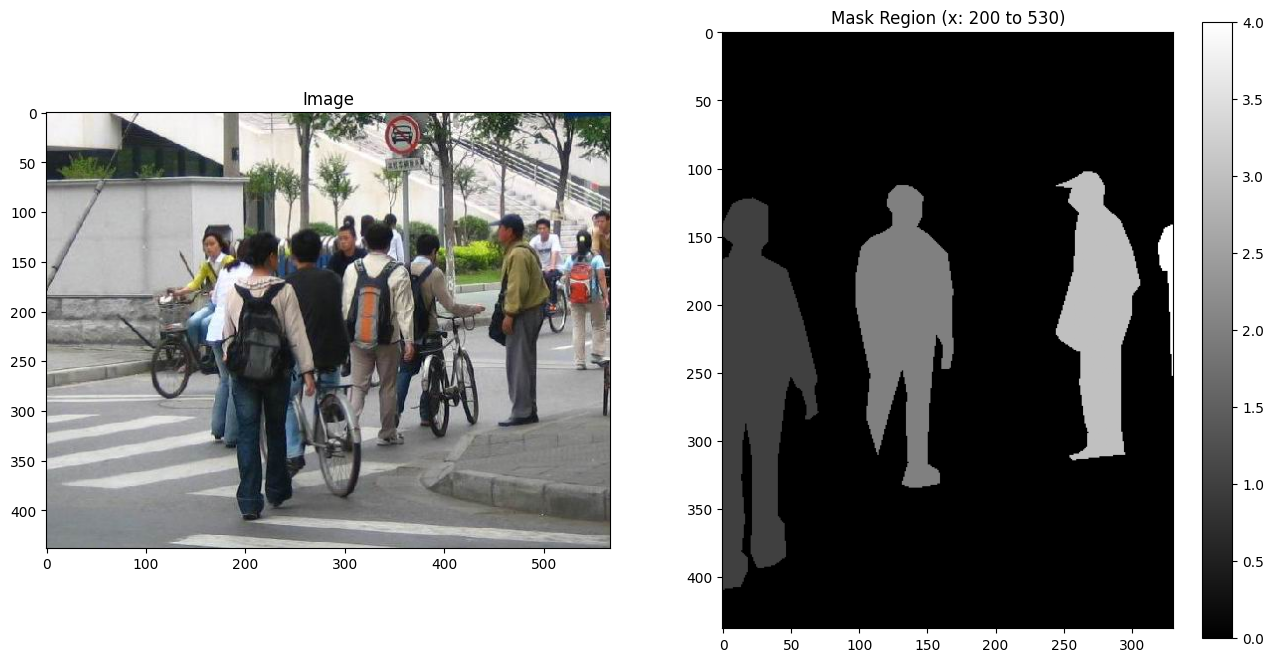

In [4]:
import torch
import matplotlib.pyplot as plt

# xÏ∂ï Î≤îÏúÑ 200ÏóêÏÑú 530ÍπåÏßÄ Ïä¨ÎùºÏù¥Ïã± (heightÎäî Î™®Îëê ÏÑ†ÌÉù)
mask_region = mask[:, :, 200:531]  # xÏ¢åÌëú 200Î∂ÄÌÑ∞ 530ÍπåÏßÄ

# Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôî
plt.imshow(mask_region[0].cpu().numpy(), cmap='gray')  # [0]ÏùÄ Î∞∞Ïπò Ï∞®ÏõêÏùÑ Ï†úÏô∏Ìïú Î∂ÄÎ∂Ñ
plt.colorbar()  # ÏÉâÏÉÅ ÎßâÎåÄ Ï∂îÍ∞Ä (ÎßàÏä§ÌÅ¨ Í∞í ÌôïÏù∏Ïö©)
plt.title("Mask Region (x: 200 to 530)")
plt.show()


In [5]:
mask[:,:,200:531]

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)

In [6]:
print(torch.unique(mask[:,:,200:531]))


tensor([0, 1, 2, 3, 4], dtype=torch.uint8)


In [7]:
from torchvision.io import read_image 
import torch
torch.set_printoptions(threshold=torch.inf)
read_image(r"C:\PapersWithCode\05_CV\07_Faster_rcnn\data\PennFudanPed\PedMasks\FudanPed00001_mask.png").shape

torch.Size([1, 536, 559])


Í∞Å Ïù¥ÎØ∏ÏßÄÎäî Ìï¥ÎãπÌïòÎäî ÏÑ∏Í∑∏Î©òÌÖåÏù¥ÏÖò ÎßàÏä§ÌÅ¨Í∞Ä ÏûàÏúºÎ©∞, Í∞Å ÏÉâÏÉÅÏùÄ Îã§Î•∏ Ïù∏Ïä§ÌÑ¥Ïä§Î•º ÎÇòÌÉÄÎÉÖÎãàÎã§. Ïù¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏúÑÌïú `torch.utils.data.Dataset` ÌÅ¥ÎûòÏä§Î•º ÏûëÏÑ±Ìï¥ Î¥ÖÏãúÎã§. ÏïÑÎûò ÏΩîÎìúÏóêÏÑúÎäî Ïù¥ÎØ∏ÏßÄ, Î∞îÏö¥Îî© Î∞ïÏä§ Î∞è ÎßàÏä§ÌÅ¨Î•º `torchvision.tv_tensors.TVTensor` ÌÅ¥ÎûòÏä§Î°ú ÎûòÌïëÌïòÏó¨, Ï£ºÏñ¥ÏßÑ Í∞ùÏ≤¥ ÌÉêÏßÄ Î∞è ÏÑ∏Í∑∏Î©òÌÖåÏù¥ÏÖò ÏûëÏóÖÏùÑ ÏúÑÌïú torchvision ÎÇ¥Ïû• Î≥ÄÌôò([ÏÉàÎ°úÏö¥ Transforms API](https://pytorch.org/vision/stable/transforms.html))ÏùÑ Ï†ÅÏö©Ìï† Ïàò ÏûàÎèÑÎ°ù Ìï©ÎãàÎã§. Ï¶â, Ïù¥ÎØ∏ÏßÄ ÌÖêÏÑúÎäî `torchvision.tv_tensors.Image`Î°ú ÎûòÌïëÎêòÍ≥†, Î∞îÏö¥Îî© Î∞ïÏä§Îäî `torchvision.tv_tensors.BoundingBoxes`Î°ú, ÎßàÏä§ÌÅ¨Îäî `torchvision.tv_tensors.Mask`Î°ú ÎûòÌïëÎê©ÎãàÎã§. `torchvision.tv_tensors.TVTensor`Îäî `torch.Tensor`Ïùò ÌïòÏúÑ ÌÅ¥ÎûòÏä§Ïù¥ÎØÄÎ°ú, ÎûòÌïëÎêú Í∞ùÏ≤¥Îì§ÎèÑ ÌÖêÏÑúÏù¥Î©∞ Í∏∞Î≥∏ `torch.Tensor` APIÎ•º ÏÉÅÏÜçÎ∞õÏäµÎãàÎã§. `torchvision`Ïùò `tv_tensors`Ïóê ÎåÄÌïú ÏûêÏÑ∏Ìïú ÎÇ¥Ïö©ÏùÄ [Ïù¥ Î¨∏ÏÑú](https://pytorch.org/vision/main/auto_examples/transforms/plot_transforms_getting_started.html#what-are-tvtensors)Î•º Ï∞∏Ï°∞ÌïòÏÑ∏Ïöî.


In [8]:
import os  # ÌååÏùº Î∞è ÎîîÎ†âÌÜ†Î¶¨ Í≤ΩÎ°úÎ•º Îã§Î£®Í∏∞ ÏúÑÌïú Í∏∞Î≥∏ ÎùºÏù¥Î∏åÎü¨Î¶¨
import torch  # PyTorch ÎùºÏù¥Î∏åÎü¨Î¶¨
from torchvision.io import read_image  # Ïù¥ÎØ∏ÏßÄÎ•º ÌÖêÏÑúÎ°ú Î°úÎìúÌïòÎäî Ìï®Ïàò
from torchvision.ops.boxes import masks_to_boxes  # ÎßàÏä§ÌÅ¨Î°úÎ∂ÄÌÑ∞ Î∞îÏö¥Îî© Î∞ïÏä§Î•º ÏÉùÏÑ±ÌïòÎäî Ìï®Ïàò
from torchvision import tv_tensors  # torchvisionÏóêÏÑú Ï†úÍ≥µÌïòÎäî ÌäπÏàò ÌÖêÏÑú (Image, BoundingBoxes, Mask)
from torchvision.transforms.v2 import functional as F  # Ïù¥ÎØ∏ÏßÄ Î≥ÄÌôò Í¥ÄÎ†® Í∏∞Îä• Ï†úÍ≥µ


class PennFudanDataset(torch.utils.data.Dataset):
    def __init__(self, root, transforms):
        """
        PennFudanDataset ÌÅ¥ÎûòÏä§Ïùò Ï¥àÍ∏∞Ìôî Ìï®Ïàò

        :param root: Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Î£®Ìä∏ ÎîîÎ†âÌÜ†Î¶¨ Í≤ΩÎ°ú
        :param transforms: Ïù¥ÎØ∏ÏßÄ Î∞è Ïñ¥ÎÖ∏ÌÖåÏù¥ÏÖòÏóê Ï†ÅÏö©Ìï† Î≥ÄÌôò(transform) Ìï®Ïàò
        """
        self.root = root  # Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ Ï†ÄÏû•Îêú Î£®Ìä∏ ÎîîÎ†âÌÜ†Î¶¨ Ï†ÄÏû•
        self.transforms = transforms  # Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò Ìï®Ïàò Ï†ÄÏû•

        # Ïù¥ÎØ∏ÏßÄÏôÄ ÎßàÏä§ÌÅ¨ ÌååÏùº Î™©Î°ùÏùÑ Î∂àÎü¨ÏôÄÏÑú Ï†ïÎ†¨ (ÌååÏùº Ïù¥Î¶Ñ ÏàúÏÑú Ïú†ÏßÄ)
        self.imgs = list(sorted(os.listdir(os.path.join(root, "PNGImages"))))  # Ïù¥ÎØ∏ÏßÄ ÌååÏùº Î™©Î°ù
        self.masks = list(sorted(os.listdir(os.path.join(root, "PedMasks"))))  # ÎßàÏä§ÌÅ¨ ÌååÏùº Î™©Î°ù

    def __getitem__(self, idx):
        """
        Ï£ºÏñ¥ÏßÑ Ïù∏Îç±Ïä§(idx)Ïóê Ìï¥ÎãπÌïòÎäî Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÏùÑ Î∞òÌôòÌïòÎäî Ìï®Ïàò

        :param idx: Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú ÌäπÏ†ï ÏÉòÌîåÏùÑ Í∞ÄÏ†∏Ïò¨ Ïù∏Îç±Ïä§
        :return: (Ïù¥ÎØ∏ÏßÄ ÌÖêÏÑú, Ïñ¥ÎÖ∏ÌÖåÏù¥ÏÖò ÎîïÏÖîÎÑàÎ¶¨)
        """
        # Ìï¥Îãπ Ïù∏Îç±Ïä§Ïùò Ïù¥ÎØ∏ÏßÄÏôÄ ÎßàÏä§ÌÅ¨ ÌååÏùº Í≤ΩÎ°ú ÏÉùÏÑ±
        img_path = os.path.join(self.root, "PNGImages", self.imgs[idx])
        mask_path = os.path.join(self.root, "PedMasks", self.masks[idx])

        # Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÏñ¥ ÌÖêÏÑúÎ°ú Î≥ÄÌôò (ÌòïÌÉú: [C, H, W])
        img = read_image(img_path)

        # ÎßàÏä§ÌÅ¨ Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÏñ¥ ÌÖêÏÑúÎ°ú Î≥ÄÌôò (ÌòïÌÉú: [1, H, W])
        mask = read_image(mask_path)

        #mask        
        # 0 0 0 0 0 0 0 0
        # 0 1 1 1 0 2 2 2
        # 0 1 1 1 0 2 2 2
        # 0 0 0 0 0 0 0 0



        # ÎßàÏä§ÌÅ¨ÏóêÏÑú Í≥†Ïú†Ìïú Í∞í(Í∞ùÏ≤¥ ID) Ï∂îÏ∂ú
        obj_ids = torch.unique(mask)  # Î™®Îì† ÌîΩÏÖÄ Í∞íÏóêÏÑú Ïú†ÏùºÌïú Í∞íÏùÑ Ï∞æÏùå
        #->[0,1,2]
        
        obj_ids = obj_ids[1:]  # Ï≤´ Î≤àÏß∏ Í∞í(Î∞∞Í≤Ω, 0)ÏùÑ Ï†úÏô∏ [1,2]

        # Í∞ùÏ≤¥ Í∞úÏàò Ï†ÄÏû•
        num_objs = len(obj_ids)


        # Í∞Å Í∞ùÏ≤¥ IDÏóê ÎåÄÌï¥ Ïù¥ÏßÑ ÎßàÏä§ÌÅ¨(0 ÎòêÎäî 1) ÏÉùÏÑ±
        masks = (mask == obj_ids[:, None, None]).to(dtype=torch.uint8)
                                #  maskÏùò Ï∞®ÏõêÏàòÎäî (1, H, W)
                                #  # [N, 1, 1] -> (Ïòà: [3, 1, 1])

        """
            tensor([[[False,  True,  True, False],  # Í∞ùÏ≤¥ 1 (ID=1)Ïùò ÎßàÏä§ÌÅ¨
             [False,  True,  True, False],
            [False, False, False, False]],

            [[False, False, False,  True],  # Í∞ùÏ≤¥ 2 (ID=2)Ïùò ÎßàÏä§ÌÅ¨
             [False, False, False,  True],
             [False, False, False, False]],

            [[False, False, False, False],  # Í∞ùÏ≤¥ 3 (ID=3)Ïùò ÎßàÏä§ÌÅ¨
             [False, False, False, False],
             [False,  True,  True,  True]]])

        """


        # Ïù¥ÏßÑ ÎßàÏä§ÌÅ¨Î•º Í∏∞Î∞òÏúºÎ°ú Í∞ùÏ≤¥Î≥Ñ Î∞îÏö¥Îî© Î∞ïÏä§ ÏÉùÏÑ± (XYXY ÌòïÏãù)
        boxes = masks_to_boxes(masks)

        # Î™®Îì† Í∞ùÏ≤¥Îäî ÎèôÏùºÌïú ÌÅ¥ÎûòÏä§(Î≥¥ÌñâÏûê)Î°ú Ï∑®Í∏â (ÌÅ¥ÎûòÏä§ ID = 1)
        labels = torch.ones((num_objs,), dtype=torch.int64)

        # Ïù¥ÎØ∏ÏßÄ Í≥†Ïú† ID (Faster R-CNNÏùÄ Ïù¥ÎØ∏ÏßÄ IDÎ•º ÌïÑÏöîÎ°ú Ìï®)
        image_id = idx

        # Î∞îÏö¥Îî© Î∞ïÏä§Ïùò Î©¥Ï†Å Í≥ÑÏÇ∞
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])

        # Î™®Îì† Í∞ùÏ≤¥Îäî "crowd"Í∞Ä ÏïÑÎãò (COCO Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Íµ∞Ïßë Í∞ùÏ≤¥Î•º ÎÇòÌÉÄÎÇ¥Îäî Í∞í, 0 = Í∞úÎ≥Ñ Í∞ùÏ≤¥)
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)

        # Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞Î•º torchvisionÏùò tv_tensors.ImageÎ°ú Î≥ÄÌôò (Î©îÌÉÄÎç∞Ïù¥ÌÑ∞ Ïú†ÏßÄ)
        img = tv_tensors.Image(img)

        # ÌÉÄÍ≤ü Ïñ¥ÎÖ∏ÌÖåÏù¥ÏÖò Ï†ïÎ≥¥Î•º ÎîïÏÖîÎÑàÎ¶¨Î°ú Ï†ÄÏû•
        target = {}
        target["boxes"] = tv_tensors.BoundingBoxes(boxes, format="XYXY", canvas_size=F.get_size(img))  # Î∞îÏö¥Îî© Î∞ïÏä§
        target["masks"] = tv_tensors.Mask(masks)  # ÎßàÏä§ÌÅ¨ Ï†ïÎ≥¥
        target["labels"] = labels  # ÌÅ¥ÎûòÏä§ ÎùºÎ≤® (1: Î≥¥ÌñâÏûê)
        target["image_id"] = image_id  # Ïù¥ÎØ∏ÏßÄ ID
        target["area"] = area  # Í∞ùÏ≤¥ Î©¥Ï†Å
        target["iscrowd"] = iscrowd  # Í∞ùÏ≤¥ Íµ∞Ïßë Ïó¨Î∂Ä (0 = Í∞úÎ≥Ñ Í∞ùÏ≤¥)

        # Î≥ÄÌôòÏù¥ Ï°¥Ïû¨Ìï† Í≤ΩÏö∞, Ïù¥ÎØ∏ÏßÄÏôÄ ÌÉÄÍ≤üÏóê Î≥ÄÌôò Ï†ÅÏö© (Ïòà: Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï, ÌÅ¨Í∏∞ Ï°∞Ï†ï)
        if self.transforms is not None:
            img, target = self.transforms(img, target)

        return img, target  # Ïù¥ÎØ∏ÏßÄ ÌÖêÏÑúÏôÄ Ïñ¥ÎÖ∏ÌÖåÏù¥ÏÖò Ï†ïÎ≥¥ Î∞òÌôò

    def __len__(self):
        """
        Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÌÅ¨Í∏∞(Ï¥ù Ïù¥ÎØ∏ÏßÄ Í∞úÏàò) Î∞òÌôò

        :return: Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Ï†ÑÏ≤¥ ÌÅ¨Í∏∞ (int)
        """
        return len(self.imgs)  # Ïù¥ÎØ∏ÏßÄ ÌååÏùº Í∞úÏàòÎ•º Î∞òÌôò


Ïù¥Ï†ú Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌïú Î∂ÄÎ∂ÑÏùÄ ÎÅùÎÇ¨ÏäµÎãàÎã§. Ïù¥Ï†ú Ïù¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú ÏòàÏ∏°ÏùÑ ÏàòÌñâÌï† Ïàò ÏûàÎäî Î™®Îç∏ÏùÑ Ï†ïÏùòÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§.

Î™®Îç∏ Ï†ïÏùòÌïòÍ∏∞
===================

Ïù¥ ÌäúÌÜ†Î¶¨ÏñºÏóêÏÑúÎäî [Mask R-CNN](https://arxiv.org/abs/1703.06870)ÏùÑ ÏÇ¨Ïö©Ìï† Í≤ÉÏûÖÎãàÎã§. Ïù¥ Î™®Îç∏ÏùÄ [Faster R-CNN](https://arxiv.org/abs/1506.01497)ÏùÑ Í∏∞Î∞òÏúºÎ°ú ÌïòÍ≥† ÏûàÏäµÎãàÎã§. Faster R-CNNÏùÄ Ïù¥ÎØ∏ÏßÄ ÎÇ¥Ïùò Ïû†Ïû¨Ï†Å Í∞ùÏ≤¥Ïóê ÎåÄÌï¥ Î∞îÏö¥Îî© Î∞ïÏä§ÏôÄ ÌÅ¥ÎûòÏä§ Ï†êÏàòÎ•º ÏòàÏ∏°ÌïòÎäî Î™®Îç∏ÏûÖÎãàÎã§.

![image](https://pytorch.org/tutorials/_static/img/tv_tutorial/tv_image03.png)

Mask R-CNNÏùÄ Faster R-CNNÏóê Ï∂îÍ∞ÄÏ†ÅÏù∏ Î∂ÑÍ∏∞Î•º Ï∂îÍ∞ÄÌïòÏó¨ Í∞Å Ïù∏Ïä§ÌÑ¥Ïä§Ïóê ÎåÄÌïú ÏÑ∏Í∑∏Î©òÌÖåÏù¥ÏÖò ÎßàÏä§ÌÅ¨ÎèÑ ÏòàÏ∏°Ìï©ÎãàÎã§.

![image](https://pytorch.org/tutorials/_static/img/tv_tutorial/tv_image04.png)

TorchVision Î™®Îç∏ ZooÏóêÏÑú ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Î™®Îç∏ÏùÑ ÏàòÏ†ïÌïòÍ≥†Ïûê Ìï† Îïå Îëê Í∞ÄÏßÄ ÏùºÎ∞òÏ†ÅÏù∏ ÏÉÅÌô©Ïù¥ ÏûàÏäµÎãàÎã§. Ï≤´ Î≤àÏß∏Îäî ÎØ∏Î¶¨ ÌõàÎ†®Îêú Î™®Îç∏ÏóêÏÑú ÏãúÏûëÌïòÏó¨ ÎßàÏßÄÎßâ Î†àÏù¥Ïñ¥Îßå ÌååÏù∏ÌäúÎãùÌïòÎäî Í≤ΩÏö∞ÏûÖÎãàÎã§. Îëê Î≤àÏß∏Îäî Î™®Îç∏Ïùò Î∞±Î≥∏ÏùÑ Îã§Î•∏ Í≤ÉÏúºÎ°ú ÍµêÏ≤¥ÌïòÎ†§Îäî Í≤ΩÏö∞ (Ïòà: Îçî Îπ†Î•∏ ÏòàÏ∏°ÏùÑ ÏúÑÌï¥)ÏûÖÎãàÎã§.

Ïù¥Ï†ú Îã§Ïùå ÏÑπÏÖòÏóêÏÑú Ïñ¥ÎñªÍ≤å ÌïòÎÇò ÎòêÎäî Îã§Î•∏ Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäîÏßÄ ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§.

- ÌäπÏ†ï Í¥ÄÏã¨ ÏòÅÏó≠(RoI, Region of Interest)ÏùÑ Í≥†Ï†ïÎêú ÌÅ¨Í∏∞Î°ú Î≥ÄÌôòÌïòÎäî Ïó∞ÏÇ∞

1 - ÎØ∏Î¶¨ ÌõàÎ†®Îêú Î™®Îç∏ÏóêÏÑú ÌååÏù∏ÌäúÎãùÌïòÍ∏∞
--------------------------------------

COCOÏóêÏÑú ÎØ∏Î¶¨ ÌõàÎ†®Îêú Î™®Îç∏ÏùÑ ÏãúÏûëÏúºÎ°ú, ÌäπÏ†ï ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌï¥ ÌååÏù∏ÌäúÎãùÌïòÎ†§Í≥† ÌïúÎã§Í≥† Í∞ÄÏ†ïÌï¥ Î¥ÖÏãúÎã§. Ïù¥Î•º ÏàòÌñâÌïòÎäî Í∞ÄÎä•Ìïú Î∞©Î≤ïÏùÄ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§:


Ï≤´ Î≤àÏß∏ ÏΩîÎìúÎäî ResNet-50 + FPNÏùÑ BackboneÏúºÎ°ú ÏÇ¨Ïö©ÌïòÎ©∞, Î≥¥Îã§ Ï†ÑÌÜµÏ†ÅÏù∏ ResNet Í∏∞Î∞òÏùò Faster R-CNN Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.

In [9]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# COCO Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú ÌïôÏäµÎêú Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")
# torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="COCO")


# Î∂ÑÎ•òÍ∏∞ÏóêÏÑú Í∞êÏßÄÌï† ÌÅ¥ÎûòÏä§ ÏàòÎ•º ÏÑ§Ï†ï (1Í∞úÏùò ÌÅ¥ÎûòÏä§(ÏÇ¨Îûå) + Î∞∞Í≤Ω)
num_classes = 2  # 1 class (person) + background

# ÌòÑÏû¨ Î∂ÑÎ•òÍ∏∞Ïùò ÏûÖÎ†• ÌäπÏßï ÏàòÎ•º Í∞ÄÏ†∏Ïò¥
in_features = model.roi_heads.box_predictor.cls_score.in_features

# ÏÇ¨Ï†Ñ ÌïôÏäµÎêú Ìó§ÎìúÎ•º ÏÉàÎ°ú Ï†ïÏùòÌïú Ìó§ÎìúÎ°ú ÍµêÏ≤¥
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)


In [10]:
in_features

1024

In [11]:
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

2 - Modifying the model to add a different backbone
===================================================


Îëê Î≤àÏß∏ ÏΩîÎìúÎäî MobileNetV2Î•º BackboneÏúºÎ°ú ÏÇ¨Ïö©ÌïòÏó¨ Í≤ΩÎüâÌôîÎêú Faster R-CNN Î™®Îç∏ÏùÑ Íµ¨Ï∂ïÌïòÍ≥†, RPNÍ≥º ROI PoolingÏùÑ ÏßÅÏ†ë Ïª§Ïä§ÌÑ∞ÎßàÏù¥ÏßïÌïòÏó¨ ÏÇ¨Ïö©Ìï©ÎãàÎã§.

In [12]:
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator

# Î∂ÑÎ•òÎ•º ÏúÑÌïú ÏÇ¨Ï†Ñ ÌïôÏäµÎêú Î™®Îç∏ÏùÑ Î∂àÎü¨Ïò§Í≥†, Ïò§ÏßÅ ÌäπÏßï(feature)Îßå Î∞òÌôòÌïòÎèÑÎ°ù ÏÑ§Ï†ï
backbone = torchvision.models.mobilenet_v2(weights="DEFAULT").features

print(backbone) # Î™®Îç∏Ïùò Í∏∞Ï†Ä(Í∏∞Î≥∏) ÎÑ§Ìä∏ÏõåÌÅ¨

# FasterRCNNÏùÄ backboneÏùò Ï∂úÎ†• Ï±ÑÎÑê ÏàòÎ•º ÏïåÏïÑÏïº Ìï®.
# mobilenet_v2Îäî 1280Í∞úÏùò Ï∂úÎ†• Ï±ÑÎÑêÏùÑ Í∞ÄÏßÄÎØÄÎ°ú Ïù¥Î•º ÏÑ§Ï†ï
backbone.out_channels = 1280

# RPN(Region Proposal Network)Ïù¥ Í∞Å Í≥µÍ∞Ñ ÏúÑÏπòÏóêÏÑú 5Í∞úÏùò ÌÅ¨Í∏∞ÏôÄ 3Í∞úÏùò ÎπÑÏú®ÏùÑ Í∞ÄÏßÑ 5 x 3Í∞úÏùò ÏïµÏª§Î•º ÏÉùÏÑ±ÌïòÎèÑÎ°ù ÏÑ§Ï†ï
# Í∞Å ÌîºÏ≤ò ÎßµÎßàÎã§ Îã§Î•∏ ÌÅ¨Í∏∞ÏôÄ ÎπÑÏú®ÏùÑ Í∞ÄÏßà Ïàò ÏûàÏúºÎØÄÎ°ú Tuple[Tuple[int]]Î°ú ÏÑ§Ï†ï
anchor_generator = AnchorGenerator(
    sizes=((32, 64, 128, 256, 512),),  # 5Í∞úÏùò ÏïµÏª§ ÌÅ¨Í∏∞ ÏÑ§Ï†ï
    aspect_ratios=((0.5, 1.0, 2.0),)    # 3Í∞úÏùò ÎπÑÏú® ÏÑ§Ï†ï
)

# ROI(Region of Interest) ÏûêÎ•¥Í∏∞ÏóêÏÑú ÏÇ¨Ïö©Ìï† ÌîºÏ≤ò ÎßµÍ≥º ÏûêÎ•¥Í∏∞ ÌõÑ ÌÅ¨Í∏∞Î•º Ï†ïÏùò
# backboneÏù¥ TensorÎ•º Î∞òÌôòÌïòÎ©¥ featmap_namesÎäî [0]Ïù¥Ïñ¥Ïïº Ìï®. ÏùºÎ∞òÏ†ÅÏúºÎ°ú backboneÏùÄ ``OrderedDict[Tensor]``Î•º Î∞òÌôòÌïòÎ©∞,
# Ïù¥Îïå featmap_namesÏóêÏÑú ÏÇ¨Ïö©Ìï† ÌîºÏ≤ò ÎßµÏùÑ ÏÑ†ÌÉùÌï† Ïàò ÏûàÏùå
roi_pooler = torchvision.ops.MultiScaleRoIAlign(
    featmap_names=['0'],  # ÏÇ¨Ïö©Ìï† ÌîºÏ≤ò Îßµ Ïù¥Î¶Ñ
    output_size=7,        # Î¶¨ÏÇ¨Ïù¥Ïßï ÌõÑ ÌÅ¨Í∏∞ (7x7 ÌÅ¨Í∏∞)
    sampling_ratio=2      # ÏÉòÌîåÎßÅ ÎπÑÏú®
)

# Ïù¥Ï†ú ÏúÑÏóêÏÑú Ï†ïÏùòÌïú ÏöîÏÜåÎì§ÏùÑ Í≤∞Ìï©ÌïòÏó¨ Faster R-CNN Î™®Îç∏ÏùÑ ÎßåÎì¨
model = FasterRCNN(
    backbone,                        # backbone ÎÑ§Ìä∏ÏõåÌÅ¨
    num_classes=2,                    # 1Í∞úÏùò ÌÅ¥ÎûòÏä§(ÏÇ¨Îûå) + Î∞∞Í≤Ω
    rpn_anchor_generator=anchor_generator,  # ÏïµÏª§ ÏÉùÏÑ±Í∏∞
    box_roi_pool=roi_pooler                # ROI ÌíÄÎßÅ
)


Sequential(
  (0): Conv2dNormActivation(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU6(inplace=True)
  )
  (1): InvertedResidual(
    (conv): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (2): InvertedResidual(
    (conv): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (

PennFudan Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏúÑÌïú Í∞ùÏ≤¥ ÌÉêÏßÄ Î∞è Ïù∏Ïä§ÌÑ¥Ïä§ ÏÑ∏Í∑∏Î©òÌÖåÏù¥ÏÖò Î™®Îç∏
======================================================================

Ïö∞Î¶¨Ïùò Í≤ΩÏö∞, Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ Îß§Ïö∞ ÏûëÍ∏∞ ÎïåÎ¨∏Ïóê ÎØ∏Î¶¨ ÌõàÎ†®Îêú Î™®Îç∏ÏóêÏÑú ÌååÏù∏ÌäúÎãùÌïòÎäî Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÎ†§Í≥† Ìï©ÎãàÎã§. Îî∞ÎùºÏÑú Ï≤´ Î≤àÏß∏ Î∞©Î≤ïÏùÑ Îî∞Î•º Í≤ÉÏûÖÎãàÎã§.

Ïó¨Í∏∞ÏóêÏÑúÎäî Ïù∏Ïä§ÌÑ¥Ïä§ ÏÑ∏Í∑∏Î©òÌÖåÏù¥ÏÖò ÎßàÏä§ÌÅ¨ÎèÑ Í≥ÑÏÇ∞ÌïòÎ†§Í≥† ÌïòÎØÄÎ°ú, Mask R-CNNÏùÑ ÏÇ¨Ïö©Ìï† Í≤ÉÏûÖÎãàÎã§:


In [13]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor


def get_model_instance_segmentation(num_classes):
    # COCO Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú ÏÇ¨Ï†Ñ ÌïôÏäµÎêú Ïù∏Ïä§ÌÑ¥Ïä§ ÏÑ∏Í∑∏Î©òÌÖåÏù¥ÏÖò Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
    model = torchvision.models.detection.maskrcnn_resnet50_fpn(weights="DEFAULT")

    # Î∂ÑÎ•òÍ∏∞Ïùò ÏûÖÎ†• ÌäπÏßï ÏàòÎ•º Í∞ÄÏ†∏Ïò§Í∏∞
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # ÏÇ¨Ï†Ñ ÌïôÏäµÎêú Î∂ÑÎ•òÍ∏∞Î•º ÏÇ¨Ïö©Ïûê Ï†ïÏùò ÌÅ¥ÎûòÏä§ ÏàòÏóê ÎßûÎäî ÏÉàÎ°úÏö¥ Î∂ÑÎ•òÍ∏∞Î°ú ÍµêÏ≤¥
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # ÎßàÏä§ÌÅ¨ Î∂ÑÎ•òÍ∏∞Ïùò ÏûÖÎ†• ÌäπÏßï ÏàòÎ•º Í∞ÄÏ†∏Ïò§Í∏∞
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    hidden_layer = 256  # Ïà®Í≤®ÏßÑ Î†àÏù¥Ïñ¥ ÌÅ¨Í∏∞ ÏÑ§Ï†ï
    # ÎßàÏä§ÌÅ¨ ÏòàÏ∏°Í∏∞Î•º ÏÉàÎ°úÏö¥ ÏòàÏ∏°Í∏∞Î°ú ÍµêÏ≤¥
    model.roi_heads.mask_predictor = MaskRCNNPredictor(
        in_features_mask,   # ÎßàÏä§ÌÅ¨ ÏòàÏ∏°Í∏∞Ïùò ÏûÖÎ†• ÌäπÏßï Ïàò
        hidden_layer,       # Ïà®Í≤®ÏßÑ Î†àÏù¥Ïñ¥ ÌÅ¨Í∏∞
        num_classes         # ÏÇ¨Ïö©Ïûê Ï†ïÏùò ÌÅ¥ÎûòÏä§ Ïàò
    )

    return model


Í∑∏Í≤å Ï†ÑÎ∂ÄÏûÖÎãàÎã§. Ïù¥Ï†ú `model`ÏùÄ ÏÇ¨Ïö©Ïûê Ï†ïÏùò Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú ÌïôÏäµÌïòÍ≥† ÌèâÍ∞ÄÌï† Ï§ÄÎπÑÍ∞Ä ÎêòÏóàÏäµÎãàÎã§.

Î™®Îì† Í≤É ÌÜµÌï©ÌïòÍ∏∞
===========================

`references/detection/` Ìè¥ÎçîÏóêÎäî Í∞ùÏ≤¥ ÌÉêÏßÄ Î™®Îç∏Ïùò ÌïôÏäµ Î∞è ÌèâÍ∞ÄÎ•º Í∞ÑÏÜåÌôîÌïòÎäî Ïó¨Îü¨ ÎèÑÏö∞ÎØ∏ Ìï®ÏàòÎì§Ïù¥ ÏûàÏäµÎãàÎã§. Ïó¨Í∏∞ÏÑúÎäî `references/detection/engine.py`ÏôÄ `references/detection/utils.py`Î•º ÏÇ¨Ïö©Ìï† Í≤ÉÏûÖÎãàÎã§. `references/detection` Ìè¥Îçî ÏïÑÎûòÏùò Î™®Îì† ÌååÏùºÏùÑ ÏûêÏã†Ïùò Ìè¥ÎçîÏóê Îã§Ïö¥Î°úÎìúÌïòÍ≥† Ïó¨Í∏∞ÏÑú ÏÇ¨Ïö©ÌïòÎ©¥ Îê©ÎãàÎã§. Î¶¨ÎàÖÏä§ÏóêÏÑúÎäî `wget`Ïù¥ ÏÑ§ÏπòÎêòÏñ¥ ÏûàÎã§Î©¥ ÏïÑÎûò Î™ÖÎ†πÏñ¥Î•º ÏÇ¨Ïö©ÌïòÏó¨ Îã§Ïö¥Î°úÎìúÌï† Ïàò ÏûàÏäµÎãàÎã§:


In [14]:
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/engine.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/utils.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_utils.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_eval.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/transforms.py")

1

v0.15.0Î∂ÄÌÑ∞ torchvisionÏùÄ [ÏÉàÎ°úÏö¥ Transforms API](https://pytorch.org/vision/stable/transforms.html)Î•º Ï†úÍ≥µÌïòÏó¨ Í∞ùÏ≤¥ ÌÉêÏßÄ Î∞è ÏÑ∏Í∑∏Î©òÌÖåÏù¥ÏÖò ÏûëÏóÖÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ ÏâΩÍ≤å ÏûëÏÑ±Ìï† Ïàò ÏûàÏäµÎãàÎã§.

Ïù¥Ï†ú Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï / Î≥ÄÌôòÏùÑ ÏúÑÌïú Î™á Í∞ÄÏßÄ ÎèÑÏö∞ÎØ∏ Ìï®ÏàòÎ•º ÏûëÏÑ±Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§:


In [15]:
from torchvision.transforms import v2 as T

def get_transform(train):
    # Î≥ÄÌôò Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî
    transforms = []
    
    # ÌïôÏäµ Ïãú, ÎûúÎç§ ÏàòÌèâ Îí§ÏßëÍ∏∞ Ï∂îÍ∞Ä (50% ÌôïÎ•†Î°ú Îí§ÏßëÍ∏∞)
    if train:
        transforms.append(T.RandomHorizontalFlip(0.5))
    
    # ÌÖêÏÑúÎ•º float ÌòïÏúºÎ°ú Î≥ÄÌôòÌïòÍ≥†, Í∞íÏùÑ [0, 1] Î≤îÏúÑÎ°ú Ïä§ÏºÄÏùºÎßÅ
    transforms.append(T.ToDtype(torch.float, scale=True))
    
    # ÏàúÏàò ÌÖêÏÑú ÌòïÌÉúÎ°ú Î≥ÄÌôò
    transforms.append(T.ToPureTensor())
    
    # Î≥ÄÌôò Î¶¨Ïä§Ìä∏Î•º T.ComposeÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í≤∞Ìï©
    return T.Compose(transforms)


`forward()` Î©îÏÑúÎìú ÌÖåÏä§Ìä∏ (ÏÑ†ÌÉù ÏÇ¨Ìï≠)
=====================================

Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î∞òÎ≥µÌïòÍ∏∞ Ï†ÑÏóê, ÌïôÏäµ Î∞è Ï∂îÎ°† Ïãú Î™®Îç∏Ïù¥ ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Î¨¥ÏóáÏùÑ Í∏∞ÎåÄÌïòÎäîÏßÄ ÌôïÏù∏ÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏäµÎãàÎã§.


In [16]:
import utils

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")
dataset = PennFudanDataset('data/PennFudanPed', get_transform(train=True))
data_loader = torch.utils.data.DataLoader(
    dataset,
    batch_size=2,
    shuffle=True,
    collate_fn=utils.collate_fn
)

# For Training
images, targets = next(iter(data_loader))
images = list(image for image in images)
targets = [{k: v for k, v in t.items()} for t in targets]
output = model(images, targets)  # Returns losses and detections
print(output)

# For inference
model.eval()
x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]
predictions = model(x)  # Returns predictions
print(predictions[0])

{'loss_classifier': tensor(0.1184, grad_fn=<NllLossBackward0>), 'loss_box_reg': tensor(0.1098, grad_fn=<DivBackward0>), 'loss_objectness': tensor(0.0038, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>), 'loss_rpn_box_reg': tensor(0.0109, grad_fn=<DivBackward0>)}
{'boxes': tensor([], size=(0, 4), grad_fn=<StackBackward0>), 'labels': tensor([], dtype=torch.int64), 'scores': tensor([], grad_fn=<IndexBackward0>)}


Ïù¥Ï†ú ÌïôÏäµÍ≥º Í≤ÄÏ¶ùÏùÑ ÏàòÌñâÌïòÎäî Î©îÏù∏ Ìï®ÏàòÎ•º ÏûëÏÑ±Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§.


In [17]:
from engine import train_one_epoch, evaluate

# train on the GPU or on the CPU, if a GPU is not available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# our dataset has two classes only - background and person
num_classes = 2
# use our dataset and defined transformations
dataset = PennFudanDataset('data/PennFudanPed', get_transform(train=True))
dataset_test = PennFudanDataset('data/PennFudanPed', get_transform(train=False))

# split the dataset in train and test set
indices = torch.randperm(len(dataset)).tolist()
dataset = torch.utils.data.Subset(dataset, indices[:-50])
dataset_test = torch.utils.data.Subset(dataset_test, indices[-50:])

# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
    dataset,
    batch_size=2,
    shuffle=True,
    collate_fn=utils.collate_fn
)

data_loader_test = torch.utils.data.DataLoader(
    dataset_test,
    batch_size=1,
    shuffle=False,
    collate_fn=utils.collate_fn
)

# get the model using our helper function
model = get_model_instance_segmentation(num_classes)

# move model to the right device
model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(
    params,
    lr=0.005,
    momentum=0.9,
    weight_decay=0.0005
)

# and a learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(
    optimizer,
    step_size=3,
    gamma=0.1
)

# let's train it just for 2 epochs
num_epochs = 2

for epoch in range(num_epochs):
    # train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    evaluate(model, data_loader_test, device=device)

print("That's it!")

Epoch: [0]  [ 0/60]  eta: 0:00:34  lr: 0.000090  loss: 3.7797 (3.7797)  loss_classifier: 0.7910 (0.7910)  loss_box_reg: 0.3655 (0.3655)  loss_mask: 2.5691 (2.5691)  loss_objectness: 0.0488 (0.0488)  loss_rpn_box_reg: 0.0052 (0.0052)  time: 0.5713  data: 0.0100  max mem: 1639
Epoch: [0]  [10/60]  eta: 0:00:11  lr: 0.000936  loss: 1.3784 (2.1284)  loss_classifier: 0.4482 (0.4525)  loss_box_reg: 0.2052 (0.2113)  loss_mask: 0.9714 (1.4419)  loss_objectness: 0.0122 (0.0192)  loss_rpn_box_reg: 0.0035 (0.0036)  time: 0.2225  data: 0.0141  max mem: 2559
Epoch: [0]  [20/60]  eta: 0:00:07  lr: 0.001783  loss: 0.7779 (1.4459)  loss_classifier: 0.1948 (0.3285)  loss_box_reg: 0.1925 (0.2083)  loss_mask: 0.3236 (0.8827)  loss_objectness: 0.0189 (0.0216)  loss_rpn_box_reg: 0.0040 (0.0048)  time: 0.1759  data: 0.0132  max mem: 2559
Epoch: [0]  [30/60]  eta: 0:00:05  lr: 0.002629  loss: 0.6417 (1.1716)  loss_classifier: 0.1164 (0.2551)  loss_box_reg: 0.2109 (0.2204)  loss_mask: 0.2361 (0.6725)  loss_ob

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [16]:
from engine import train_one_epoch, evaluate

# GPUÍ∞Ä ÏÇ¨Ïö© Í∞ÄÎä•ÌïòÎ©¥ GPUÏóêÏÑú Ïã§ÌñâÌïòÍ≥†, Í∑∏Î†áÏßÄ ÏïäÏúºÎ©¥ CPUÏóêÏÑú Ïã§Ìñâ
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÌÅ¥ÎûòÏä§ Ïàò (Î∞∞Í≤Ω + ÏÇ¨Îûå)
num_classes = 2

# Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú Î∞è Î≥ÄÌôò Ï†ÅÏö©
dataset = PennFudanDataset('data/PennFudanPed', get_transform(train=True))
dataset_test = PennFudanDataset('data/PennFudanPed', get_transform(train=False))

# Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÌïôÏäµ(train)Í≥º ÌÖåÏä§Ìä∏(test) ÏÑ∏Ìä∏Î°ú ÎÇòÎàÑÍ∏∞
indices = torch.randperm(len(dataset)).tolist()  # Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Ïù∏Îç±Ïä§Î•º ÎûúÎç§ÌïòÍ≤å ÏÑûÏùå
dataset = torch.utils.data.Subset(dataset, indices[:-50])  # ÌïôÏäµ Îç∞Ïù¥ÌÑ∞: ÎßàÏßÄÎßâ 50Í∞úÎ•º Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ
dataset_test = torch.utils.data.Subset(dataset_test, indices[-50:])  # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: ÎßàÏßÄÎßâ 50Í∞ú

# ÌïôÏäµ Î∞è Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î°úÎçî Ï†ïÏùò
data_loader = torch.utils.data.DataLoader(
    dataset,
    batch_size=2,  # Ìïú Î≤àÏóê 2Í∞úÏî© Ï≤òÎ¶¨
    shuffle=True,  # Îç∞Ïù¥ÌÑ∞ ÏàúÏÑúÎ•º ÎûúÎç§ÌïòÍ≤å ÏÑûÏùå
    collate_fn=utils.collate_fn  # Îç∞Ïù¥ÌÑ∞ Î∞∞ÏπòÎ•º Ïò¨Î∞îÎ•¥Í≤å Ï†ïÎ¶¨ÌïòÎäî Ìï®Ïàò
)

data_loader_test = torch.utils.data.DataLoader(
    dataset_test,
    batch_size=1,  # Ìïú Î≤àÏóê 1Í∞úÏî© Ï≤òÎ¶¨
    shuffle=False,  # ÏàúÏÑúÎ•º Ïú†ÏßÄ
    collate_fn=utils.collate_fn
)

# Î™®Îç∏ ÏÉùÏÑ± (ÏÇ¨Ï†Ñ Ï†ïÏùòÎêú Ìï®Ïàò ÏÇ¨Ïö©)
model = get_model_instance_segmentation(num_classes)

# Î™®Îç∏ÏùÑ Ï†ÅÏ†àÌïú Ïû•Ïπò(GPU ÎòêÎäî CPU)Î°ú Ïù¥Îèô
model.to(device)

# ÏòµÌã∞ÎßàÏù¥Ï†Ä(Optimizer) ÏÑ§Ï†ï
params = [p for p in model.parameters() if p.requires_grad]  # ÌïôÏäµ Í∞ÄÎä•Ìïú ÌååÎùºÎØ∏ÌÑ∞Îßå ÏÑ†ÌÉù
optimizer = torch.optim.SGD(
    params,
    lr=0.005,  # ÌïôÏäµÎ•†(learning rate)
    momentum=0.9,  # Î™®Î©òÌÖÄ (SGD Í∞ÄÏÜçÏùÑ ÏúÑÌïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞)
    weight_decay=0.0005  # Í∞ÄÏ§ëÏπò Í∞êÏÜå (L2 Ï†ïÍ∑úÌôî)
)

# ÌïôÏäµÎ•† Ïä§ÏºÄÏ§ÑÎü¨ ÏÑ§Ï†ï (3 epochÎßàÎã§ ÌïôÏäµÎ•† Í∞êÏÜå)
lr_scheduler = torch.optim.lr_scheduler.StepLR(
    optimizer,
    step_size=3,  # 3 epochÎßàÎã§
    gamma=0.1  # ÌïôÏäµÎ•†ÏùÑ 0.1Î∞∞Î°ú Í∞êÏÜå
)

# ÌïôÏäµÌï† ÏóêÌè¨ÌÅ¨ Ïàò ÏÑ§Ï†ï
num_epochs = 2

for epoch in range(num_epochs):
    # 1 epoch ÎèôÏïà ÌïôÏäµ Ïã§Ìñâ (10Î≤àÎßàÎã§ ÏßÑÌñâ ÏÉÅÌô© Ï∂úÎ†•)
    train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)
    # ÌïôÏäµÎ•† ÏóÖÎç∞Ïù¥Ìä∏
    lr_scheduler.step()
    # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú ÌèâÍ∞Ä Ïã§Ìñâ
    evaluate(model, data_loader_test, device=device)

print("Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å!")


Epoch: [0]  [ 0/60]  eta: 0:00:33  lr: 0.000090  loss: 4.7185 (4.7185)  loss_classifier: 0.6781 (0.6781)  loss_box_reg: 0.2490 (0.2490)  loss_mask: 3.7845 (3.7845)  loss_objectness: 0.0029 (0.0029)  loss_rpn_box_reg: 0.0040 (0.0040)  time: 0.5620  data: 0.0090  max mem: 1867
Epoch: [0]  [10/60]  eta: 0:00:10  lr: 0.000936  loss: 1.7231 (2.3433)  loss_classifier: 0.4810 (0.4433)  loss_box_reg: 0.2383 (0.2453)  loss_mask: 0.8818 (1.6392)  loss_objectness: 0.0082 (0.0114)  loss_rpn_box_reg: 0.0029 (0.0042)  time: 0.2082  data: 0.0113  max mem: 2483
Epoch: [0]  [20/60]  eta: 0:00:07  lr: 0.001783  loss: 0.7988 (1.5152)  loss_classifier: 0.1993 (0.3042)  loss_box_reg: 0.2171 (0.2224)  loss_mask: 0.3008 (0.9738)  loss_objectness: 0.0079 (0.0093)  loss_rpn_box_reg: 0.0034 (0.0054)  time: 0.1663  data: 0.0114  max mem: 2483
Epoch: [0]  [30/60]  eta: 0:00:05  lr: 0.002629  loss: 0.5968 (1.2274)  loss_classifier: 0.1305 (0.2426)  loss_box_reg: 0.2171 (0.2325)  loss_mask: 0.2337 (0.7370)  loss_ob

Ï¶â, **Ìïú ÏóêÌè¨ÌÅ¨(epoch) ÌïôÏäµ ÌõÑ**, COCO Ïä§ÌÉÄÏùºÏùò **mAP(Mean Average Precision)** Í∞íÏù¥ 50 Ïù¥ÏÉÅÏùÑ Í∏∞Î°ùÌïòÍ≥†, ÎßàÏä§ÌÅ¨(mAP) Í∞íÏùÄ **65**Ïóê ÎèÑÎã¨ÌñàÏäµÎãàÎã§.  

Í∑∏Î†áÎã§Î©¥, Î™®Îç∏Ïù¥ Ïã§Ï†úÎ°ú Ïñ¥Îñ§ ÏòàÏ∏°ÏùÑ ÏàòÌñâÌïòÎäîÏßÄ ÌôïÏù∏Ìï¥Î¥ÖÏãúÎã§!  
Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Ìïú Ïù¥ÎØ∏ÏßÄÎ•º ÏÑ†ÌÉùÌïòÏó¨ ÏòàÏ∏° Í≤∞Í≥ºÎ•º Í≤ÄÏ¶ùÌï¥Î≥¥Í≤†ÏäµÎãàÎã§. üöÄ

In [18]:
import matplotlib.pyplot as plt
from torchvision.utils import draw_bounding_boxes, draw_segmentation_masks

# ÏòàÏ∏°Ìï† Ïù¥ÎØ∏ÏßÄ Î°úÎìú
image = read_image("data/PennFudanPed/PNGImages/FudanPed00046.png")

# ÌèâÍ∞Ä(ÌÖåÏä§Ìä∏)Ïö© Î≥ÄÌôò Ï†ÅÏö©
eval_transform = get_transform(train=False)

# Î™®Îç∏ÏùÑ ÌèâÍ∞Ä Î™®ÎìúÎ°ú ÏÑ§Ï†ï
model.eval()

# Í∑∏ÎùºÎîîÏñ∏Ìä∏ Í≥ÑÏÇ∞ ÎπÑÌôúÏÑ±Ìôî (ÌèâÍ∞Ä Ïãú Î∂àÌïÑÏöîÌïú Ïó∞ÏÇ∞ Î∞©ÏßÄ)
with torch.no_grad():
    x = eval_transform(image)  # Î≥ÄÌôò Ï†ÅÏö©
    # RGBA -> RGB Î≥ÄÌôò ÌõÑ, ÎîîÎ∞îÏù¥Ïä§(GPU ÎòêÎäî CPU)Î°ú Ïù¥Îèô
    x = x[:3, ...].to(device)
    predictions = model([x, ])  # Î™®Îç∏Ïóê ÏûÖÎ†•ÌïòÏó¨ ÏòàÏ∏° ÏàòÌñâ
    pred = predictions[0]  # Ï≤´ Î≤àÏß∏ ÏòàÏ∏° Í≤∞Í≥º Í∞ÄÏ†∏Ïò§Í∏∞

# Ïù¥ÎØ∏ÏßÄ Ï†ïÍ∑úÌôî Ìï¥Ï†ú (0~255 Î≤îÏúÑÎ°ú Î≥ÄÌôò) ÌõÑ Ï†ïÏàòÌòï(uint8)ÏúºÎ°ú Î≥ÄÌôò
image = (255.0 * (image - image.min()) / (image.max() - image.min())).to(torch.uint8)

# RGBA Ï±ÑÎÑê Ï†úÍ±∞ (RGBÎ°ú Î≥ÄÌôò)
image = image[:3, ...]

# ÏòàÏ∏°Îêú Í∞ùÏ≤¥Îì§Ïùò Î†àÏù¥Î∏îÍ≥º Ïã†Î¢∞ÎèÑ Ï†êÏàò ÏÑ§Ï†ï
pred_labels = [f"pedestrian: {score:.3f}" for label, score in zip(pred["labels"], pred["scores"])]

# ÏòàÏ∏°Îêú Í∞ùÏ≤¥Îì§Ïùò Î∞îÏö¥Îî© Î∞ïÏä§ Ï¢åÌëú ÏÑ§Ï†ï (Ï†ïÏàòÌòï Î≥ÄÌôò)
pred_boxes = pred["boxes"].long()

# Ïù¥ÎØ∏ÏßÄÏóê Î∞îÏö¥Îî© Î∞ïÏä§ Í∑∏Î¶¨Í∏∞ (Îπ®Í∞ÑÏÉâ)
output_image = draw_bounding_boxes(image, pred_boxes, pred_labels, colors="red")

# ÏòàÏ∏°Îêú ÎßàÏä§ÌÅ¨ (confidence 0.7 Ïù¥ÏÉÅ) ÏÑ§Ï†ï
masks = (pred["masks"] > 0.7).squeeze(1)

# Ïù¥ÎØ∏ÏßÄÏóê ÏÑ∏Í∑∏Î©òÌÖåÏù¥ÏÖò ÎßàÏä§ÌÅ¨ Í∑∏Î¶¨Í∏∞ (Î∞òÌà¨Î™Ö ÌååÎûÄÏÉâ)
output_image = draw_segmentation_masks(output_image, masks, alpha=0.5, colors="blue")

# Í≤∞Í≥º Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•
plt.figure(figsize=(12, 12))
plt.imshow(output_image.permute(1, 2, 0))  # PyTorch (C, H, W) -> (H, W, C) Î≥ÄÌôò

# Ïù¥ÎØ∏ÏßÄ ÌååÏùºÎ°ú Ï†ÄÏû•
plt.savefig("output_image.png")


### ÎßàÎ¨¥Î¶¨ üöÄ  

Ïù¥Î≤à ÌäúÌÜ†Î¶¨ÏñºÏùÑ ÌÜµÌï¥ **Í∞ùÏ≤¥ ÌÉêÏßÄ(Object Detection) Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ïûê ÏßÄÏ†ï Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú ÌïôÏäµÌïòÎäî Î∞©Î≤ï**ÏùÑ Î∞∞Ïõ†ÏäµÎãàÎã§.  

Ïù¥Î•º ÏúÑÌï¥ Îã§ÏùåÍ≥º Í∞ôÏùÄ ÏûëÏóÖÏùÑ ÏàòÌñâÌñàÏäµÎãàÎã§:  
- `torch.utils.data.Dataset` ÌÅ¥ÎûòÏä§Î•º ÏßÅÏ†ë Íµ¨ÌòÑÌïòÏó¨ **Ïù¥ÎØ∏ÏßÄ, Î∞îÏö¥Îî© Î∞ïÏä§, ÏÑ∏Í∑∏Î©òÌÖåÏù¥ÏÖò ÎßàÏä§ÌÅ¨**Î•º Î∞òÌôòÌïòÎèÑÎ°ù ÏÑ§Ï†ï  
- **COCO train2017 Îç∞Ïù¥ÌÑ∞ÏÖã**ÏúºÎ°ú ÏÇ¨Ï†Ñ ÌïôÏäµÎêú **Mask R-CNN Î™®Îç∏**ÏùÑ ÌôúÏö©ÌïòÏó¨ **Ï†ÑÏù¥ ÌïôÏäµ(Transfer Learning)** ÏàòÌñâ  

Îçî **Í≥†Í∏â ÏòàÏ†ú**(Î©ÄÌã∞ Î®∏Ïã†/Î©ÄÌã∞ GPU ÌïôÏäµ Ìè¨Ìï®)Î•º ÏÇ¥Ìé¥Î≥¥Í≥† Ïã∂Îã§Î©¥, **torchvision Ï†ÄÏû•ÏÜå**Ïóê ÏûàÎäî `references/detection/train.py`Î•º Ï∞∏Í≥†ÌïòÏÑ∏Ïöî. üöÄ